# Customer Segmentation - KMeans

In [74]:
import random 
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.max_columns', None)

import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve,roc_auc_score,fbeta_score,recall_score
from sklearn.metrics import plot_precision_recall_curve,average_precision_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn import metrics


In [82]:
df = pd.read_csv('Engineered Transaction Data.csv')

In [83]:
df.columns

Index(['id', 'order_id', 'restaurant_id', 'channel', 'date', 'year', 'month',
       'weekofday', 'day', 'transaction_amount', '#items_purchased',
       'total_points_earned', 'total_points_burned', 'base_points_earned',
       'bonus_points_earned', 'mobile_order', 'total_freq',
       'sum_transaction_amount', 'sum_total_points_earned',
       'sum_base_points_earned', 'sum_bonus_points_earned',
       'sum_total_points_burned', 'avg_money_per_order',
       'daily_transaction_amount', 'daily_#items_purchased',
       'daily_total_points_earned', 'daily_total_points_burned',
       'daily_base_points_earned', 'daily_bonus_points_earned',
       'days_since_last_purchase', 'Drive_Thru', 'Front_Counter', 'Curbside',
       'avg_recency', 'first_day', 'last_day', 'total_day',
       'avg_order_per_day'],
      dtype='object')

Text(0, 0.5, 'Mean Sum of Square')

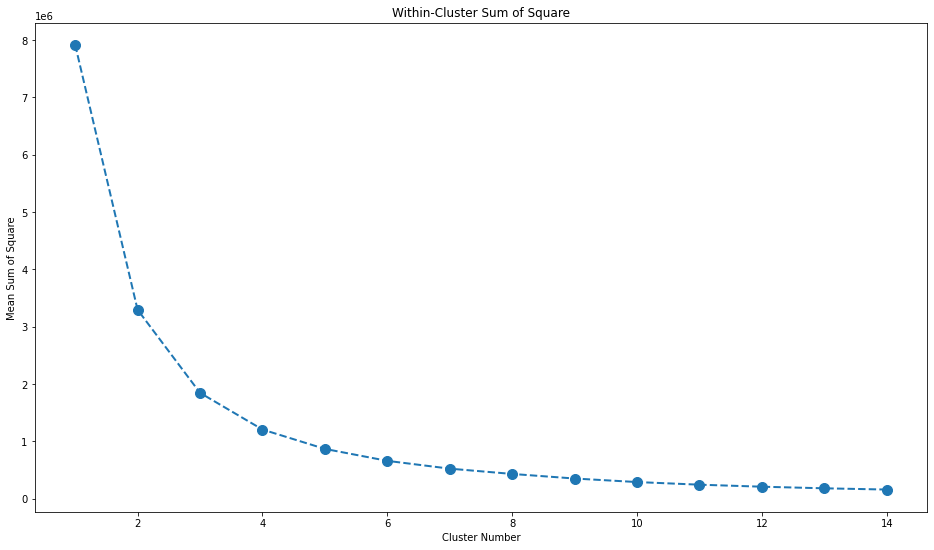

In [88]:
wcss = []
x = df[['avg_order_per_day','avg_money_per_order']]
x=x.to_numpy()
x_std=sc.fit_transform(x)

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (16,9))
plt.plot(np.arange(1,15,1), wcss, linestyle='dashed',marker='o', lw=2,ms=10)
plt.title("Within-Cluster Sum of Square")
plt.xlabel("Cluster Number")
plt.ylabel("Mean Sum of Square")

Text(0, 0.5, 'Mean Sum of Square')

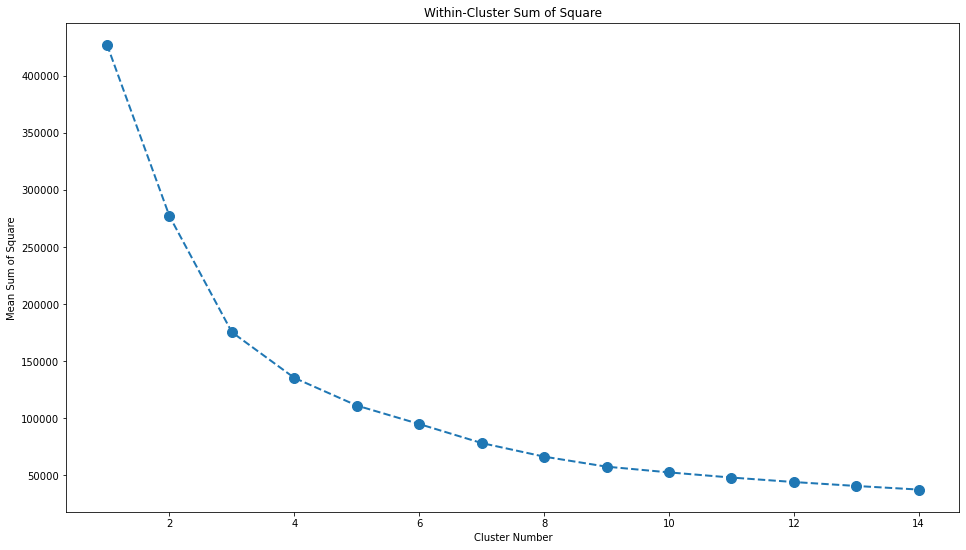

In [89]:
wcss = []
x = df[['avg_order_per_day','avg_money_per_order']]
x=x.to_numpy()
x_std=sc.fit_transform(x)

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300)
    kmeans.fit(x_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (16,9))
plt.plot(np.arange(1,15,1), wcss, linestyle='dashed',marker='o', lw=2,ms=10)
plt.title("Within-Cluster Sum of Square")
plt.xlabel("Cluster Number")
plt.ylabel("Mean Sum of Square")

In [71]:
cmap = ['r','g','b','y','c','m','k','w']

def KmeansAndVisualize(Dataset,NumOfClusters,X,Y):
    kmeans = KMeans(n_clusters = NumOfClusters,
                   init='k-means++',
                   n_init=10,
                   max_iter=300)
    pred = kmeans.fit_predict(Dataset)
    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    for i in range(NumOfClusters):
        plt.scatter(Dataset[pred==i,0],
                    Dataset[pred==i,1],
                    s=50,
                    c=cmap[i],
                    marker='o',
                    edgecolor='k',
                   )
    plt.grid()
    plt.xlabel(X)
    plt.ylabel(Y)

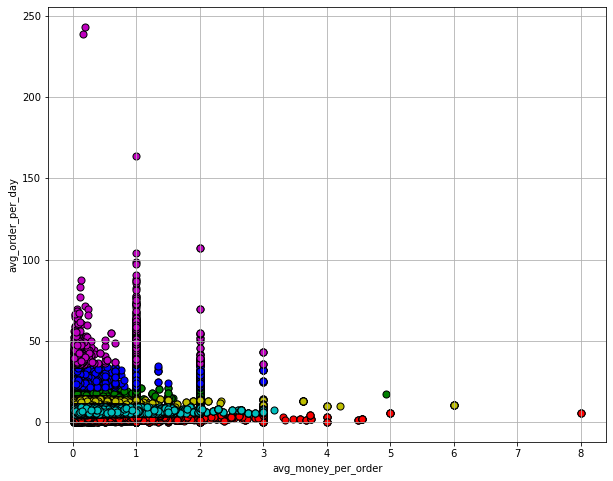

In [91]:
KmeansAndVisualize(x,6,'avg_money_per_order','avg_order_per_day')

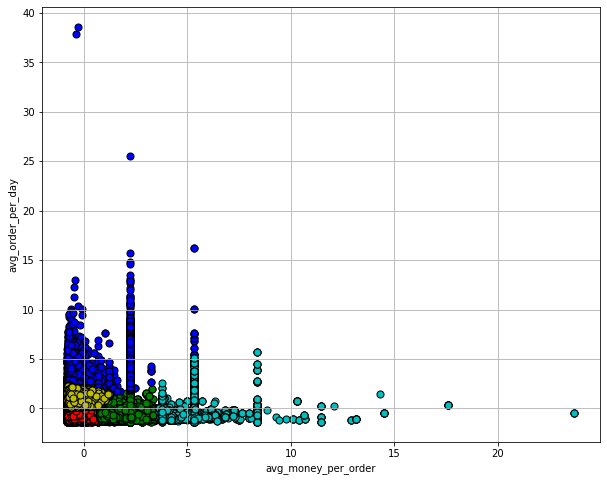

In [95]:
KmeansAndVisualize(x_std,5,'avg_money_per_order','avg_order_per_day')

# Summary Statistics

In [98]:
# Final Model
km = KMeans(n_clusters=6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300, 
            random_state=0)

y_km = km.fit_predict(x_std)

In [99]:
label_series=pd.Series(y_km)

In [100]:
df['label']=label_series

In [101]:
df[['avg_order_per_day','avg_money_per_order','label']].groupby('label').agg(['mean','min','max'])

avg_order_per_day         avg_money_per_order        
                   mean min max                mean min max
label                                                      
0                     1   1   1                   6   0  19
1                     0   0   1                   5   0   9
2                     0   0   1                  10   7  16
3                     1   0   2                  32  19 243
4                     0   0   1                  20  15  34
5                     2   1   8                   8   0  43

In [102]:

#合并后
# rename the labels
label_dict = {
    1:'lv1 low activity',
    2:'lv2 moderate money value',
    0:'lv2 moderate frequency',
    4:'lv2 moderate money value',
    5:'lv3 high frequency',
    3:'lv3 high money value'
    }


In [103]:

clusterid_dict = {
    1:1,
    2:2,
    0:3,
    4:2,
    3:4,
    5:5
    }


In [104]:
df['cluster_id']=df.label.map(clusterid_dict)

In [107]:
df.label=df.label.map(label_dict)

In [108]:
df.head()

,id,order_id,restaurant_id,channel,date,year,month,weekofday,day,transaction_amount,#items_purchased,total_points_earned,total_points_burned,base_points_earned,bonus_points_earned,mobile_order,total_freq,sum_transaction_amount,sum_total_points_earned,sum_base_points_earned,sum_bonus_points_earned,sum_total_points_burned,avg_money_per_order,daily_transaction_amount,daily_#items_purchased,daily_total_points_earned,daily_total_points_burned,daily_base_points_earned,daily_bonus_points_earned,days_since_last_purchase,Drive_Thru,Front_Counter,Curbside,avg_recency,first_day,last_day,total_day,avg_order_per_day,label,cluster_id
0,261954,POS0001:719946723,195500337555,Front Counter,2021-07-02,2021,7,4,2,6,4,579,0,579,0,0,1,6,579,579,0,0,6,6,4,579,0,579,0,NaN,0,1,0,300,2021-07-02,2021-07-02,1,1,lv2 moderate frequency,3
1,81120,POS0012:669023567,195500295046,Drive Thru,2021-07-01,2021,7,3,1,23,11,0,0,0,0,1,1,23,0,0,0,0,23,23,11,0,0,0,0,NaN,1,0,0,300,2021-07-01,2021-07-01,1,1,lv3 high money value,4
2,127457,FOE0019:988543733,195500266329,Curbside,2021-07-04,2021,7,6,4,0,1,0,1500,0,0,1,2,4,399,399,0,1500,2,4,4,399,1500,399,0,NaN,0,0,1,300,2021-07-04,2021-07-04,1,2,lv3 high frequency,5
3,127457,FOE0019:1092875964,195500266329,Curbside,2021-07-04,2021,7,6,4,4,3,399,0,399,0,1,2,4,399,399,0,1500,2,4,4,399,1500,399,0,NaN,0,0,1,300,2021-07-04,2021-07-04,1,2,lv3 high frequency,5
4,184564,POS0012:12375165,195500330037,Drive Thru,2021-07-04,2021,7,6,4,5,3,467,0,467,0,1,1,5,467,467,0,0,5,5,3,467,0,467,0,NaN,1,0,0,300,2021-07-04,2021-07-04,1,1,lv2 moderate frequency,3


In [109]:
df[['avg_order_per_day','avg_money_per_order','label']].groupby('label').agg(['mean','min','max','count'])

avg_order_per_day                  \
                                      mean min max   count   
label                                                        
lv1 low activity                         0   0   1  100355   
lv2 moderate frequency                   1   1   1   23857   
lv2 moderate money value                 0   0   1   83700   
lv3 high frequency                       2   1   8    2082   
lv3 high money value                     1   0   2    3527   

                         avg_money_per_order                  
                                        mean min max   count  
label                                                         
lv1 low activity                           5   0   9  100355  
lv2 moderate frequency                     6   0  19   23857  
lv2 moderate money value                  12   7  34   83700  
lv3 high frequency                         8   0  43    2082  
lv3 high money value                      32  19 243    3527

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 0, 'Frequency (Average Oder Per Day)')

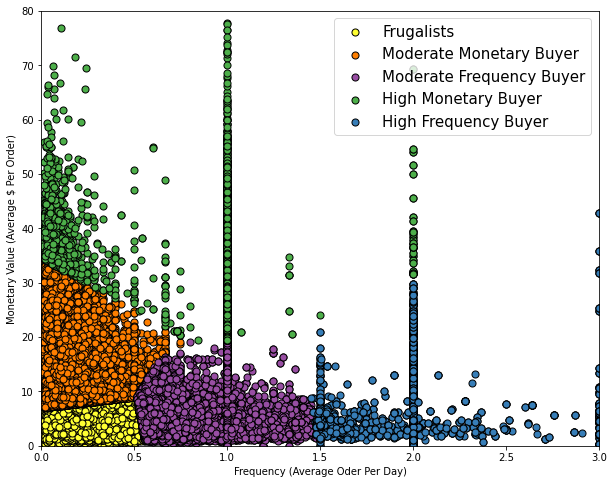

In [111]:
#visualize the clustering

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)

graph_list=[]

for i in range(1,6):
    graph=plt.scatter(
        
        df.loc[df.cluster_id==i,'avg_order_per_day'],
        df.loc[df.cluster_id==i,'avg_money_per_order'],

        s=50,
        axes=ax1,
        
        marker='o',
        edgecolor='k', 
        c=plt.get_cmap('Set1')(6-i),
    )
    graph_list.append(graph)

ax1.set_xlim(0,3)
ax1.set_ylim(0,80)
ax1.legend(
    graph_list,
    ('Frugalists',
    'Moderate Monetary Buyer',
    'Moderate Frequency Buyer',
     'High Monetary Buyer',
    'High Frequency Buyer'
    ),
    scatterpoints=1,
    loc='upper right',
    ncol=1,
    fontsize=15
)


plt.ylabel('Monetary Value (Average $ Per Order)')
plt.xlabel('Frequency (Average Oder Per Day)')


In [112]:
# df.to_csv("Engineered Transaction Data.csv", index=False)

# Segment the Churn Group

In [115]:
# exclude frugalists (natrually churned group)

update_df = df[df['cluster_id']!=1]

In [125]:
recency =update_df[['id', 'avg_recency']].drop_duplicates().dropna(axis = 0)

11.058823529411764 30.166666666666668


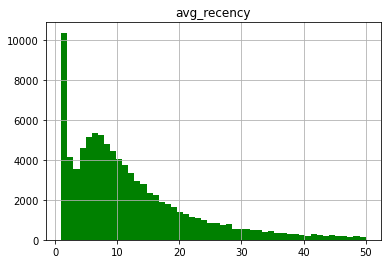

In [132]:
hist = recency[recency['avg_recency'] <= 50][['avg_recency']].hist(bins=50, color = 'green')
regular_val = np.quantile(recency['avg_recency'], 0.50)
churned_val = np.quantile(recency['avg_recency'], 0.80)
print(regular_val, churned_val)

In [135]:
def function_to_do_2a(df, regular_val, churned_val):
    churn = df

  # we don't need the non_recovered part, they belong to the churned group
  # has_complained.loc[has_complained['avg_recency_day'] == not_recovered_val, 'Designation'] = "Non_Recovered"
    churn.loc[churn['avg_recency'] < regular_val, 'Designation'] = "Regular"
    churn.loc[(churn['avg_recency'] >= regular_val) & (df['avg_recency'] <= churned_val), 'Designation'] = "Low_Active"
    churn.loc[churn['avg_recency'] > churned_val, 'Designation'] = "Churned"
    return churn

In [141]:
df = function_to_do_2a(update_df, int(regular_val), int(churned_val))
df['Churned'] = df[df['Designation']=="Churned"]


df['churned'] = df['Designation'].apply(lambda x: 1 if x == "Churned" else 0)

ValueError: Expected a 1D array, got an array with shape (113166, 41)

In [140]:
df.head()

,id,order_id,restaurant_id,channel,date,year,month,weekofday,day,transaction_amount,#items_purchased,total_points_earned,total_points_burned,base_points_earned,bonus_points_earned,mobile_order,total_freq,sum_transaction_amount,sum_total_points_earned,sum_base_points_earned,sum_bonus_points_earned,sum_total_points_burned,avg_money_per_order,daily_transaction_amount,daily_#items_purchased,daily_total_points_earned,daily_total_points_burned,daily_base_points_earned,daily_bonus_points_earned,days_since_last_purchase,Drive_Thru,Front_Counter,Curbside,avg_recency,first_day,last_day,total_day,avg_order_per_day,label,cluster_id,Designation
0,261954,POS0001:719946723,195500337555,Front Counter,2021-07-02,2021,7,4,2,6,4,579,0,579,0,0,1,6,579,579,0,0,6,6,4,579,0,579,0,NaN,0,1,0,300,2021-07-02,2021-07-02,1,1,lv2 moderate frequency,3,Churned
1,81120,POS0012:669023567,195500295046,Drive Thru,2021-07-01,2021,7,3,1,23,11,0,0,0,0,1,1,23,0,0,0,0,23,23,11,0,0,0,0,NaN,1,0,0,300,2021-07-01,2021-07-01,1,1,lv3 high money value,4,Churned
2,127457,FOE0019:988543733,195500266329,Curbside,2021-07-04,2021,7,6,4,0,1,0,1500,0,0,1,2,4,399,399,0,1500,2,4,4,399,1500,399,0,NaN,0,0,1,300,2021-07-04,2021-07-04,1,2,lv3 high frequency,5,Churned
3,127457,FOE0019:1092875964,195500266329,Curbside,2021-07-04,2021,7,6,4,4,3,399,0,399,0,1,2,4,399,399,0,1500,2,4,4,399,1500,399,0,NaN,0,0,1,300,2021-07-04,2021-07-04,1,2,lv3 high frequency,5,Churned
4,184564,POS0012:12375165,195500330037,Drive Thru,2021-07-04,2021,7,6,4,5,3,467,0,467,0,1,1,5,467,467,0,0,5,5,3,467,0,467,0,NaN,1,0,0,300,2021-07-04,2021-07-04,1,1,lv2 moderate frequency,3,Churned


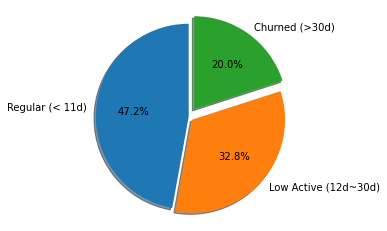

In [138]:
labels = 'Regular (< 11d)', 'Low Active (12d~30d)', 'Churned (>30d)'
sizes = [4716, 3282, 2002]
explode = (0, 0.05, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()